In [17]:
import joblib
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [18]:
data = pd.read_csv('Crop_recommendation.csv')  
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


C:\Users\HP\AppData\Local\Temp\ipykernel_8296\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

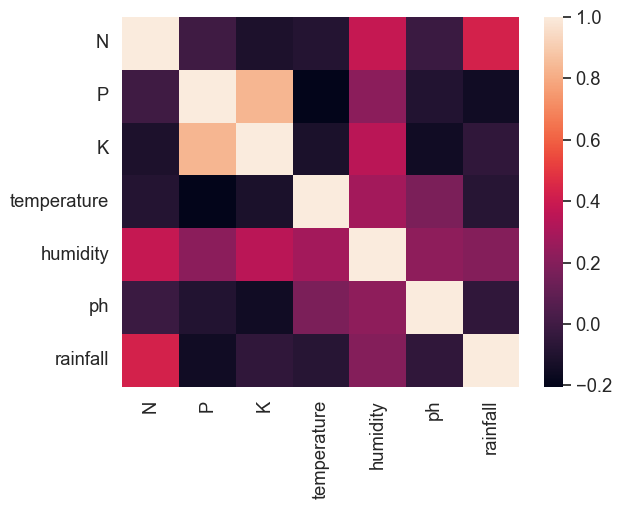

In [19]:
sns.heatmap(data.corr())

In [20]:
data.isnull().sum()
data.to_numpy()

array([[90, 42, 43, ..., 6.502985292, 202.9355362, 'rice'],
       [85, 58, 41, ..., 7.038096361, 226.6555374, 'rice'],
       [60, 55, 44, ..., 7.840207144, 263.9642476, 'rice'],
       ...,
       [35, 67, 49, ..., 6.617066674, 239.7427554, 'papaya'],
       [56, 59, 55, ..., 6.551892638, 188.5181422, 'papaya'],
       [39, 64, 53, ..., 6.598860305, 208.3357976, 'papaya']],
      dtype=object)

In [21]:
X = data[['N','P','K','temperature','humidity','ph','rainfall']]
y = data['label']

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

c:\Users\HP\Desktop\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = logModel.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)


accuracy 0.18333333333333332


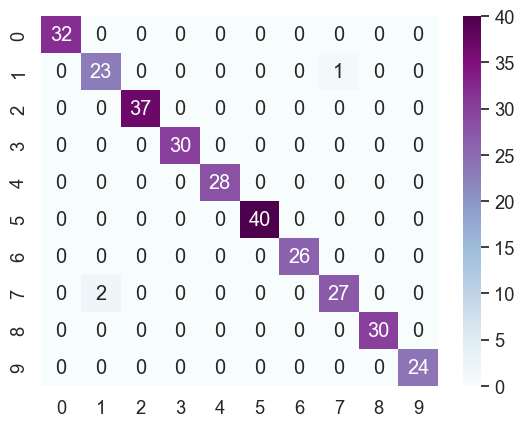

In [27]:
ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
tp = ConfusionMatrix[1,1]
tn = ConfusionMatrix[0,0]
total = len(y_test)
print("accuracy", (tp + tn)/total)

In [28]:
train_acc = logModel.score(X_test, y_test)
print("Model Accuracy",train_acc*100)

Model Accuracy 99.0


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        32
   blackgram       0.92      0.96      0.94        24
      grapes       1.00      1.00      1.00        37
  greengrams       1.00      1.00      1.00        30
 kidneybeans       1.00      1.00      1.00        28
       maize       1.00      1.00      1.00        40
       mango       1.00      1.00      1.00        26
   mothbeans       0.96      0.93      0.95        29
      papaya       1.00      1.00      1.00        30
        rice       1.00      1.00      1.00        24

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [30]:
#create a function to predict crop
def crop_prediction():
    # print("Input Nitrogen Level")
    # N = input()

    # print("Input Phosphate Level")
    # P = input()

    # print("Input Potassium Level")
    # K = input()

    # print("Input Temparature Level")
    # temparature = input()

    # print("Input Humidty Level")
    # humidity = input()

    # print("Input pH Level")
    # ph = input()

    # print("Input Rainfall Level")
    # rainfall = input()

    crop = logModel.predict_proba([[90,42,43,21,82,6.5,202]])
    top_five_indices = np.argsort(crop[0])[::-1][:5]
    
    
    crop_names = np.array(logModel.classes_)
    top_five_crops = crop_names[top_five_indices]
    top_five_crops_array = np.array(top_five_crops)

    # print("Top five crops:", top_five_crops)
    # print(crop)
    print("Top five crops (array):",  top_five_crops_array  )



In [31]:
# crop_prediction()


    

In [32]:
joblib.dump(logModel, 'crop.pkl')

['crop.pkl']